In [1]:
import pandas as pd
import numpy as np

In [201]:
import requests
import gzip
from io import BytesIO

file_url = 'https://storage.googleapis.com/open-courses/austral2023-labo3-d0e5/tb_sellout_01.txt.gz'

# Download the gzipped file using requests
response = requests.get(file_url)

# Check if the request was successful
if response.status_code == 200:
    # Create a file-like object from the response content
    file_content = BytesIO(response.content)

    # Open the gzipped file and read its lines
    with gzip.open(file_content, 'rt', encoding='utf-8') as file:
        lines = file.readlines()
    # Do further processing with the 'lines' variable

else:
    print("Failed to download the file.")


# Extract column names from the first 6 lines (assuming 6 lines for column names)
column_names = [line.strip() for line in lines[:6]]

# Create a dictionary from the data
data = {}
for i, col_name in enumerate(column_names):
    data[col_name] = [line.strip() for line in lines[6 + i::6]]

# Create the DataFrame
df_sellout = pd.DataFrame(data)


,periodo,customer_id,product_id,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,2,0.053,0.053
1,201701,10032,20524,1,0.13628,0.13628
2,201701,10217,20524,1,0.03028,0.03028
3,201701,10125,20524,1,0.02271,0.02271
4,201701,10012,20524,11,1.54452,1.54452
...,...,...,...,...,...,...
2945813,201912,10105,20853,1,0.0223,0.0223
2945814,201912,10092,20853,1,0.00669,0.00669
2945815,201912,10006,20853,7,0.02898,0.02898
2945816,201912,10018,20853,4,0.01561,0.01561


In [3]:
df_filter=df_sellout[df_sellout.product_id=="20001"].reset_index()

In [4]:
# Change data types for specific columns
df_filter['periodo'] = df_filter['periodo'].astype(int)
df_filter['customer_id'] = df_filter['customer_id'].astype(int)
df_filter['product_id'] = df_filter['product_id'].astype(int)
df_filter['cust_request_qty'] = df_filter['cust_request_qty'].astype(int)
df_filter['cust_request_tn'] = df_filter['cust_request_tn'].astype(float)
df_filter['tn'] = df_filter['tn'].astype(float)


In [5]:
df_filter.groupby('periodo')['tn'].sum()

periodo
201701     934.77222
201702     798.01620
201703    1303.35771
201704    1069.96130
201705    1502.20132
201706    1520.06539
201707    1030.67391
201708    1267.39462
201709    1316.94604
201710    1439.75563
201711    1580.47401
201712    1049.38860
201801    1169.07532
201802    1043.76470
201803    1856.83534
201804    1251.28462
201805    1293.89788
201806    1150.79169
201807    1470.41009
201808    1800.96168
201809    1438.67455
201810    2295.19832
201811    1813.01511
201812    1486.68669
201901    1275.77351
201902    1259.09363
201903    1470.65653
201904    1647.63848
201905    1629.78233
201906    1109.93769
201907    1678.99318
201908    1261.34529
201909    1660.00561
201910    1561.50552
201911    1397.37231
201912    1504.68856
Name: tn, dtype: float64

In [6]:
df_filter=df_filter[df_filter['periodo']<=201902].reset_index()

In [7]:
df_total=pd.DataFrame(df_filter.groupby('periodo')['tn'].sum())

In [10]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


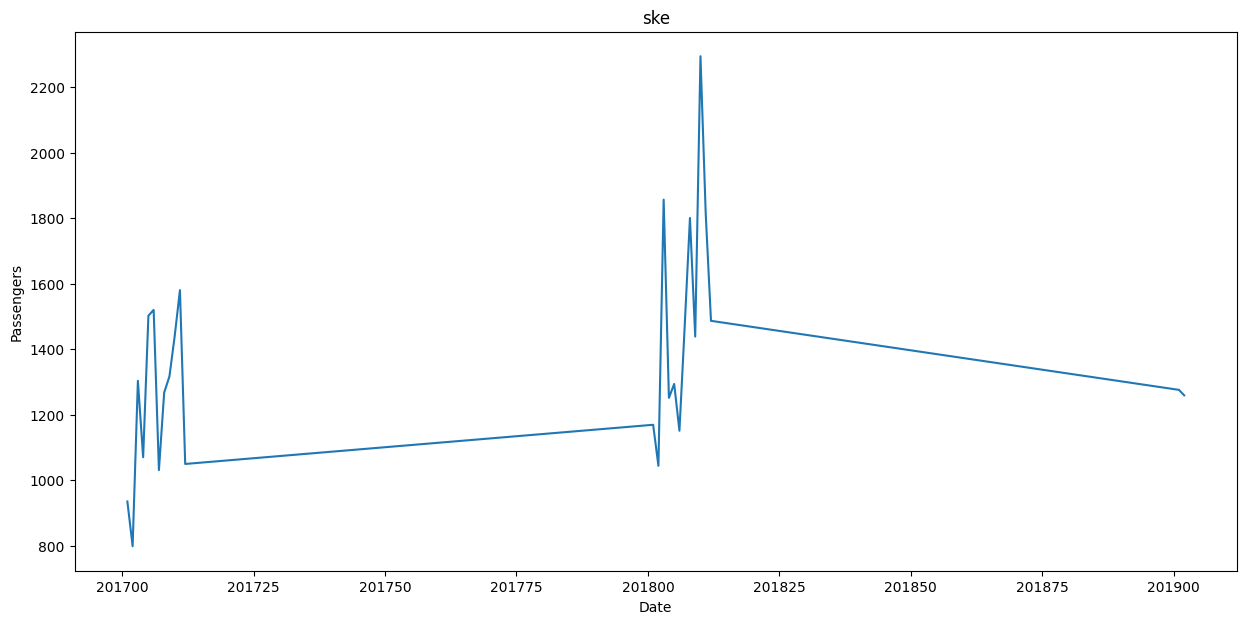

In [9]:

plt.figure(figsize=(15,7))
plt.title("ske")
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(df_total)
plt.show()

In [ ]:
df_total.columns

Index(['tn'], dtype='object')

In [10]:
df_total

,tn
periodo,
201701,934.77222
201702,798.01620
201703,1303.35771
201704,1069.96130
201705,1502.20132
201706,1520.06539
201707,1030.67391
201708,1267.39462
201709,1316.94604


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_total, *['tn'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_total, *['tn'], **{})
chart

In [11]:
ARIMA_model = pm.auto_arima(df_total['tn'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

In [12]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -179.953
Date:                Sat, 21 Oct 2023   AIC                            365.907
Time:                        15:14:14   BIC                            369.441
Sample:                             0   HQIC                           366.844
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9659      0.220     -4.384      0.000      -1.398      -0.534
ar.L2         -0.3621      0.235     -1.538      0.124      -0.824       0.099
sigma2      1.931e+05   7.37e+04      2.618      0.009    4.85e+04    3.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.55   Prob(JB):                         0.75
Heteroskedasticity (H):               2.28   Skew:                             0.12
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pm.arima()

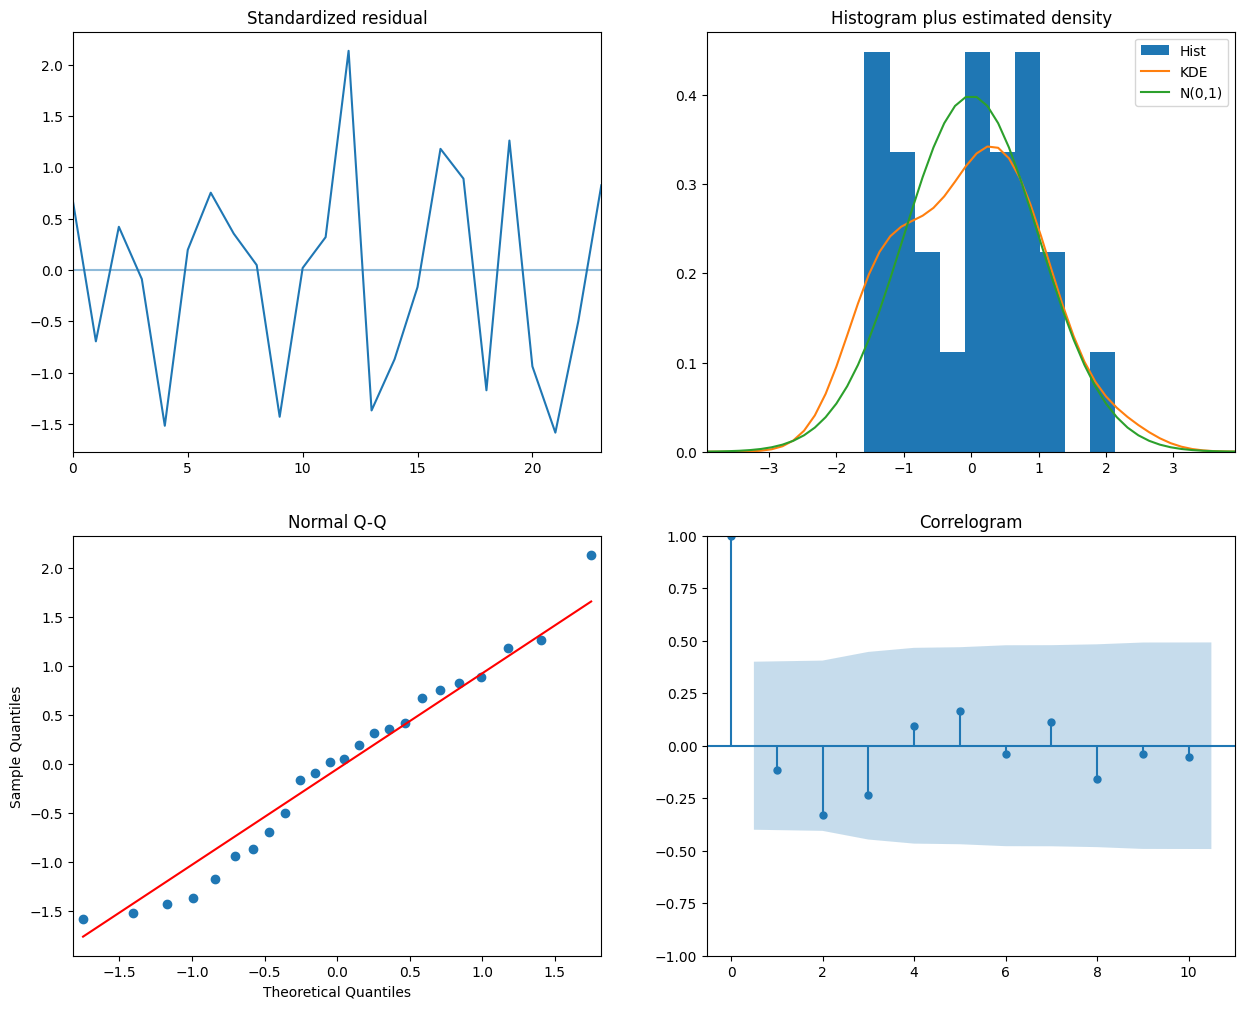

In [13]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
dos

918.1712792867397

In [ ]:
fitted

26    1013.008073
27     918.171279
dtype: float64

In [ ]:
fitted

26    1013.008073
27     918.171279
dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_ar=ARIMA((1,1,1,0))
model_ar=model_ar.fit(df_total['tn'])

In [ ]:
df_total

,tn
periodo,
201701,934.77222
201702,798.01620
201703,1303.35771
201704,1069.96130
201705,1502.20132
201706,1520.06539
201707,1030.67391
201708,1267.39462
201709,1316.94604


In [ ]:
# Define the order of the ARIMA model (p, d, q)
order = (1, 1, 1)  # Hypothetical values, adjust based on your data

# Create an ARIMA model
model_ar = ARIMA(df_total['tn'], order=order)

# Fit the model to your time series data
model_ar_fit = model_ar.fit()

# Predict the next two periods
forecast = model_ar_fit.forecast(steps=2)

# Display the forecas


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
for product_id

26    1437.016785
27    1467.787796
Name: predicted_mean, dtype: float64


In [ ]:
df_total['tn']

periodo
201701     934.77222
201702     798.01620
201703    1303.35771
201704    1069.96130
201705    1502.20132
201706    1520.06539
201707    1030.67391
201708    1267.39462
201709    1316.94604
201710    1439.75563
201711    1580.47401
201712    1049.38860
201801    1169.07532
201802    1043.76470
201803    1856.83534
201804    1251.28462
201805    1293.89788
201806    1150.79169
201807    1470.41009
201808    1800.96168
201809    1438.67455
201810    2295.19832
201811    1813.01511
201812    1486.68669
201901    1275.77351
201902    1259.09363
Name: tn, dtype: float64

In [ ]:
model_ar.predict()

array([0.74999555, 0.74999555])

In [202]:
# Change data types for specific columns
df_sellout['periodo'] = df_sellout['periodo'].astype(int)
df_sellout['customer_id'] = df_sellout['customer_id'].astype(int)
df_sellout['product_id'] = df_sellout['product_id'].astype(int)
df_sellout['cust_request_qty'] = df_sellout['cust_request_qty'].astype(int)
df_sellout['cust_request_tn'] = df_sellout['cust_request_tn'].astype(float)
df_sellout['tn'] = df_sellout['tn'].astype(float)

In [203]:
df_test=df_sellout[df_sellout['periodo']==201904].reset_index(drop=True)

In [225]:
df_test

,periodo,customer_id,product_id,cust_request_qty,cust_request_tn,tn
0,201904,10047,20524,1,0.00757,0.00757
1,201904,10007,20524,3,0.24228,0.24228
2,201904,10313,20524,1,0.00757,0.00757
3,201904,10037,20524,3,0.04543,0.04543
4,201904,10001,20524,3,1.11297,1.11297
...,...,...,...,...,...,...
77813,201904,10289,20853,1,0.03344,0.03344
77814,201904,10012,20853,1,0.01784,0.01784
77815,201904,10506,20853,1,0.00223,0.00223
77816,201904,10020,20853,6,0.02675,0.02675


In [204]:
df_sellout=df_sellout[df_sellout['periodo']<=201902].reset_index(drop=True)

In [209]:
customer_id_imp = [ 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10011, 10012, 10013 ] 

In [213]:
df_client=df_sellout[df_sellout.customer_id.isin(customer_id_imp)].reset_index(drop=True)

In [215]:
df_client=pd.DataFrame(df_client.groupby(['periodo','product_id'])['tn'].sum()).reset_index(drop=False)

In [205]:
df_all_prod=pd.DataFrame(df_sellout.groupby(['periodo','product_id'])['tn'].sum()).reset_index(drop=False)

In [216]:
df_all_prod.product_id.unique().shape

(1055,)

In [97]:
pd.DataFrame()[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].min()).index==21203]

array([False, False, False, ..., False, False, False])

In [107]:
df_all_prod.groupby('product_id')['periodo'].min()[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].min()).index==21203].values[0]

201701

In [242]:
import warnings

product_id = []
prediction_product = []

for j, i in enumerate(df_all_prod.product_id.unique()):
    df_train = pd.DataFrame({'periodo': [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902]}).merge(df_all_prod[df_all_prod['product_id'] == i], how='left')
    mes_min=df_all_prod.groupby('product_id')['periodo'].min()[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].min()).index==i].values[0]
    df_train=df_train[df_train['periodo']>=mes_min]
    df_train=df_train.reset_index(drop=True)['tn']
    df_train = df_train.fillna(0)
 #   if pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique())[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique()).index==i].periodo.values[0]<=3:
    if len(df_train)<=12:

        prediction_product.append(df_train.mean())
        product_id.append(i)

    else:

        ARIMA_model = pm.auto_arima(df_train,
                                     start_p=1,
                                     start_q=1,
                                     test='adf',
                                     max_p=2,
                                     max_q=2,
                                     m=1,
                                     d=1,
                                     seasonal=True,
                                     trace=False,
                                     error_action='warn',
                                     suppress_warnings=True,
                                     stepwise=True)
        primer, segundo = ARIMA_model.predict(n_periods=2)
        product_id.append(i)
        prediction_product.append(segundo)
        print(i,j)


20001 0
20002 1
20003 2
20004 3
20005 4
20006 5
20007 6
20008 7
20009 8
20010 9
20011 10
20012 11
20013 12
20014 13
20015 14
20016 15
20017 16
20018 17
20019 18
20020 19
20021 20
20022 21
20023 22
20024 23
20025 24
20026 25
20027 26
20028 27
20029 28
20030 29
20031 30
20033 31
20034 32
20035 33
20036 34
20037 35
20038 36
20039 37
20040 38
20041 39
20042 40
20043 41
20044 42
20045 43
20046 44
20047 45
20048 46
20050 47
20051 48
20052 49
20053 50
20054 51
20055 52
20056 53
20057 54
20058 55
20059 56
20060 57
20061 58
20062 59
20063 60
20064 61
20065 62
20066 63
20067 64
20068 65
20069 66
20070 67
20071 68
20072 69
20073 70
20074 71
20075 72
20076 73
20077 74
20078 75
20079 76
20080 77
20081 78
20082 79
20083 80
20084 81
20086 82
20087 83
20088 84
20090 85
20091 86
20092 87
20093 88
20094 89
20095 90
20096 91
20097 92
20098 93
20099 94
20100 95
20101 96
20102 97
20103 98
20104 99
20105 100
20106 101
20107 102
20108 103
20109 104
20110 105
20111 106
20113 107
20114 108
20115 109
20116 110


In [243]:
predict=pd.DataFrame({'product_id':product_id,'pred':prediction_product})

In [244]:
predict

,product_id,pred
0,20001,1470.781834
1,20002,1145.843868
2,20003,758.326570
3,20004,412.032324
4,20005,409.899500
...,...,...
1050,21105,1.190773
1051,20032,247.998800
1052,21153,0.731630
1053,21159,0.740350


In [246]:
df_test_general=pd.DataFrame(df_test.groupby('product_id')['tn'].sum()).reset_index(drop=False)

In [247]:
df_test_general

,product_id,tn
0,20001,1647.63848
1,20002,1287.62346
2,20003,565.33774
3,20004,466.70901
4,20005,624.99880
...,...,...
914,21266,0.36178
915,21267,0.12291
916,21269,0.11351
917,21271,0.00185


In [248]:
final=df_test_general.merge(predict,how='left')

In [249]:
final[final['pred'].isna()]

,product_id,tn,pred
264,20286,33.74441,NaN
328,20355,11.87918,NaN
383,20414,13.66588,NaN
407,20442,44.42110,NaN
422,20458,12.45410,NaN
437,20476,8.02267,NaN
449,20491,15.12168,NaN
464,20510,15.03756,NaN
471,20521,8.18189,NaN
475,20525,11.13529,NaN


In [179]:
final.tn.describe()[4]

1.579545

In [180]:
final.tn.describe()

count     919.000000
mean       37.562669
std       103.382810
min         0.001850
25%         1.579545
50%         7.631770
75%        25.318810
max      1647.638480
Name: tn, dtype: float64

In [181]:
final

,product_id,tn,pred
0,20001,1647.63848,1470.781834
1,20002,1287.62346,1145.843868
2,20003,565.33774,758.326570
3,20004,466.70901,412.032324
4,20005,624.99880,409.899500
...,...,...,...
914,21266,0.36178,NaN
915,21267,0.12291,NaN
916,21269,0.11351,NaN
917,21271,0.00185,0.010410


In [250]:
final=final.fillna(0)

In [251]:
final['num']=np.abs(final.tn-final.pred)
final['num'].sum()/final['tn'].sum()

In [252]:
final

,product_id,tn,pred,num
0,20001,1647.63848,1470.781834,176.856646
1,20002,1287.62346,1145.843868,141.779592
2,20003,565.33774,758.326570,192.988830
3,20004,466.70901,412.032324,54.676686
4,20005,624.99880,409.899500,215.099300
...,...,...,...,...
914,21266,0.36178,0.000000,0.361780
915,21267,0.12291,0.000000,0.122910
916,21269,0.11351,0.000000,0.113510
917,21271,0.00185,0.010410,0.008560


0.2890524050569635

In [153]:
final

,product_id,tn,pred,num
0,20001,1647.63848,1470.781834,176.856646
1,20002,1287.62346,1145.843868,141.779592
2,20003,565.33774,758.326570,192.988830
3,20004,466.70901,412.032324,54.676686
4,20005,624.99880,409.899500,215.099300
...,...,...,...,...
914,21266,0.36178,1.579545,1.217765
915,21267,0.12291,1.579545,1.456635
916,21269,0.11351,1.579545,1.466035
917,21271,0.00185,0.010410,0.008560


In [31]:
df_all_prod.product_id.unique()

array([20001, 20002, 20003, ..., 21153, 21159, 21168])

In [32]:
df_train=pd.DataFrame({'periodo':[201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
      201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
      201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
      201901, 201902]}).merge(df_all_prod[df_all_prod['product_id']==20003],how='left').reset_index(drop=True)['tn']
df_train=df_train.fillna(0)

In [33]:
df_train

0     1063.45835
1      752.11520
2      917.16548
3      525.82591
4      620.48202
5      744.08829
6      785.12398
7      864.21928
8     1465.83347
9     1958.59845
10    1426.23717
11     961.66344
12     907.56304
13     788.30749
14     778.55594
15     765.47838
16     784.35885
17     660.73323
18     656.22700
19     955.97079
20     912.34156
21    1313.34211
22    1206.91773
23     769.82869
24     964.76919
25     758.32657
Name: tn, dtype: float64

Segunda Entrega de Datos de "La Multinacional"

Sell Out https://storage.googleapis.com/open-courses/austral2023-labo3-d0e5/tb_sellout_02.txt.gz
Stocks https://storage.googleapis.com/open-courses/austral2023-labo3-d0e5/tb_stocks_02.txt.gz
Maestro de Productos ( falta nombre individual de cada producto ) https://storage.googleapis.com/open-courses/austral2023-labo3-d0e5/tb_productos_02.txt

In [84]:
df_products=pd.read_csv('https://storage.googleapis.com/open-courses/austral2023-labo3-d0e5/tb_productos_02.txt',sep='\t')

In [89]:
df_sellout=df_sellout.merge(df_products,how='left')

In [ ]:
df_sellout

In [194]:
product_id = []
prediction_product = []

for j, i in enumerate(df_all_prod.product_id.unique()):
    df_train = pd.DataFrame({'periodo': [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902]}).merge(df_all_prod[df_all_prod['product_id'] == i], how='left')
    mes_min=df_all_prod.groupby('product_id')['periodo'].min()[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].min()).index==i].values[0]
    df_train=df_train[df_train['periodo']>=mes_min]
    df_train=df_train.reset_index(drop=True)['tn']
    df_train = df_train.fillna(0)
    if pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique())[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique()).index==i].periodo.values[0]<=3:
        prediction_product.append(0)
        product_id.append(i)

    else:

        ARIMA_model = pm.auto_arima(df_train,
                                     start_p=1,
                                     start_q=1,
                                     test='adf',
                                     max_p=1,
                                     max_q=1,
                                     m=1,
                                     d=None,
                                     seasonal=True,
                                     trace=False,
                                     error_action='warn',
                                     suppress_warnings=True,
                                     stepwise=True)
        primer, segundo = ARIMA_model.predict(n_periods=2)
        product_id.append(i)
        prediction_product.append(segundo)
        print(i)

20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028


KeyboardInterrupt: 

In [163]:
df_products.cat1.unique()

array(['HC', 'PC', 'FOODS', 'REF'], dtype=object)

In [254]:
por_cat=final.merge(df_products).groupby('cat1').agg({'tn':'sum','num':'sum'})

In [255]:
por_cat.num/por_cat.tn

cat1
FOODS    0.287093
HC       0.268222
PC       0.358098
REF      0.587547
dtype: float64

In [263]:
final_prod_imp=final[final.product_id.isin([ 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20009, 20011, 20032 ])].reset_index(drop=True)
final_prod_imp.num.sum()/final_prod_imp.tn.sum()

In [265]:
final_prod_imp

,product_id,tn,pred,num
0,20001,1647.63848,1470.781834,176.856646
1,20002,1287.62346,1145.843868,141.779592
2,20003,565.33774,758.326570,192.988830
3,20004,466.70901,412.032324,54.676686
4,20005,624.99880,409.899500,215.099300
5,20006,835.47883,532.559547,302.919283
6,20007,511.54995,403.175401,108.374549
7,20009,391.28033,467.288635,76.008305
8,20011,377.42796,399.749175,22.321215
9,20032,361.38220,247.998800,113.383400


0.1986593613723165

In [241]:
product_id = []
prediction_product = []

for j, i in enumerate(df_all_prod.product_id.unique()):
    df_train = pd.DataFrame({'periodo': [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902]}).merge(df_all_prod[df_all_prod['product_id'] == i], how='left')
    mes_min=df_all_prod.groupby('product_id')['periodo'].min()[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].min()).index==i].values[0]
    df_train=df_train[df_train['periodo']>=mes_min]
    df_train=df_train.reset_index(drop=True)['tn']
    df_train = df_train.fillna(0)
 #   if pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique())[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique()).index==i].periodo.values[0]<=3:
    if len(df_train)<=12:

        prediction_product.append(df_train.mean())
        product_id.append(i)

    else:

        ARIMA_model = pm.auto_arima(df_train,
                                     start_p=1,
                                     start_q=1,
                                     test='adf',
                                     max_p=2,
                                     max_q=2,
                                     m=1,
                                     d=1,
                                     seasonal=True,
                                     trace=False,
                                     error_action='warn',
                                     suppress_warnings=True,
                                     stepwise=True)
        primer, segundo = ARIMA_model.predict(n_periods=2)
        product_id.append(i)
        prediction_product.append(segundo)
        print(i,j)

20001 0
20002 1
20003 2
20004 3
20005 4
20006 5
20007 6
20008 7
20009 8
20010 9
20011 10
20012 11
20013 12
20014 13
20015 14
20016 15
20017 16
20018 17
20019 18
20020 19
20021 20
20022 21
20023 22
20024 23
20025 24
20026 25
20027 26
20028 27
20029 28
20030 29
20031 30
20033 31
20034 32
20035 33
20036 34
20037 35
20038 36
20039 37
20040 38
20041 39
20042 40
20043 41
20044 42
20045 43
20046 44
20047 45
20048 46
20050 47
20051 48
20052 49
20053 50
20054 51
20055 52
20056 53
20057 54
20058 55
20059 56
20060 57
20061 58
20062 59
20063 60
20064 61
20065 62
20066 63
20067 64
20068 65
20069 66
20070 67
20071 68
20072 69
20073 70
20074 71
20075 72
20076 73
20077 74
20078 75
20079 76
20080 77
20081 78
20082 79
20083 80
20084 81
20086 82
20087 83
20088 84
20090 85
20091 86
20092 87
20093 88
20094 89
20095 90
20096 91
20097 92
20098 93
20099 94
20100 95
20101 96
20102 97
20103 98
20104 99
20105 100
20106 101
20107 102
20108 103
20109 104
20110 105
20111 106
20113 107
20114 108
20115 109
20116 110


KeyboardInterrupt: 

In [219]:
df_client

,periodo,product_id,tn
0,201701,20001,723.13496
1,201701,20002,383.80010
2,201701,20003,711.15073
3,201701,20004,287.40962
4,201701,20005,253.34809
...,...,...,...
21624,201902,21224,0.01215
21625,201902,21255,0.01179
21626,201902,21257,0.00197
21627,201902,21264,0.00112


In [220]:
import warnings

product_id_clien = []
prediction_product_clien = []

for j, i in enumerate(df_client.product_id.unique()):
    df_train = pd.DataFrame({'periodo': [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902]}).merge(df_client[df_client['product_id'] == i], how='left')
    mes_min=df_client.groupby('product_id')['periodo'].min()[pd.DataFrame(df_client.groupby('product_id')['periodo'].min()).index==i].values[0]
    df_train=df_train[df_train['periodo']>=mes_min]
    df_train=df_train.reset_index(drop=True)['tn']
    df_train = df_train.fillna(0)
 #   if pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique())[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique()).index==i].periodo.values[0]<=3:
    if len(df_train)<=12:

        prediction_product_clien.append(df_train.mean())
        product_id_clien.append(i)

    else:

        ARIMA_model = pm.auto_arima(df_train,
                                     start_p=1,
                                     start_q=1,
                                     test='adf',
                                     max_p=2,
                                     max_q=2,
                                     m=1,
                                     d=1,
                                     seasonal=True,
                                     trace=False,
                                     error_action='warn',
                                     suppress_warnings=True,
                                     stepwise=True)
        primer, segundo = ARIMA_model.predict(n_periods=2)
        product_id_clien.append(i)
        prediction_product_clien.append(segundo)
        print(i,j)


20001 0
20002 1
20003 2
20004 3
20005 4
20006 5
20007 6
20008 7
20009 8
20010 9
20011 10
20012 11
20013 12
20014 13
20015 14
20016 15
20017 16
20018 17
20019 18
20020 19
20021 20
20022 21
20023 22
20024 23
20025 24
20026 25
20027 26
20028 27
20029 28
20030 29
20031 30
20033 31
20034 32
20035 33
20036 34
20037 35
20038 36
20039 37
20040 38
20041 39
20042 40
20043 41
20044 42
20045 43
20046 44
20047 45
20048 46
20050 47
20051 48
20052 49
20053 50
20054 51
20055 52
20056 53
20057 54
20058 55
20059 56
20060 57
20061 58
20062 59
20063 60
20064 61
20065 62
20066 63
20067 64
20068 65
20069 66
20070 67
20071 68
20072 69
20073 70
20074 71
20075 72
20076 73
20077 74
20078 75
20079 76
20080 77
20081 78
20082 79
20083 80
20086 81
20087 82
20088 83
20090 84
20091 85
20092 86
20093 87
20094 88
20095 89
20096 90
20097 91
20098 92
20099 93
20100 94
20101 95
20102 96
20103 97
20104 98
20105 99
20106 100
20107 101
20108 102
20109 103
20110 104
20111 105
20113 106
20114 107
20115 108
20116 109
20117 110


In [223]:
predict_clien=pd.DataFrame({'product_id':product_id_clien,'pred':prediction_product_clien})

In [224]:
predict_clien

,product_id,pred
0,20001,1093.886296
1,20002,815.491513
2,20003,542.041530
3,20004,176.887370
4,20005,228.444510
...,...,...
1022,21102,0.457720
1023,21105,0.459555
1024,21153,0.119030
1025,21159,0.119030


In [226]:
df_test

,periodo,customer_id,product_id,cust_request_qty,cust_request_tn,tn
0,201904,10047,20524,1,0.00757,0.00757
1,201904,10007,20524,3,0.24228,0.24228
2,201904,10313,20524,1,0.00757,0.00757
3,201904,10037,20524,3,0.04543,0.04543
4,201904,10001,20524,3,1.11297,1.11297
...,...,...,...,...,...,...
77813,201904,10289,20853,1,0.03344,0.03344
77814,201904,10012,20853,1,0.01784,0.01784
77815,201904,10506,20853,1,0.00223,0.00223
77816,201904,10020,20853,6,0.02675,0.02675


In [227]:
df_test_client=df_test[df_test.customer_id.isin(customer_id_imp)].reset_index(drop=True)

In [233]:
df_test_client=pd.DataFrame(df_test_client.groupby('product_id')['tn'].sum()).reset_index()

In [236]:
df_test_client=df_test_client.merge(predict_clien)

In [238]:
df_test_client['num']=np.abs(df_test_client.tn-df_test_client.pred)

In [240]:
df_test_client['num'].sum()/df_test_client['tn'].sum()

0.3135346852676593

In [269]:
# univariate data preparation
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [271]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [321]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array(raw_seq[-n_steps:])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)


print(yhat)

[[103.4438]]


In [322]:
yhat_2

array([[116.54845]], dtype=float32)

103.50939

In [312]:
x_input = array(raw_seq[-n_steps+1:],yhat[0][0])


In [318]:
array([raw_seq[-n_steps+1],raw_seq[-n_steps+2],yhat[0][0]])

array([ 80.        ,  90.        , 103.50939178])

In [288]:
df_train = pd.DataFrame({'periodo': [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
   201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
   201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
   201901, 201902]}).merge(df_all_prod[df_all_prod['product_id'] == 20001], how='left')
mes_min=df_all_prod.groupby('product_id')['periodo'].min()[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].min()).index==20001].values[0]
df_train=df_train[df_train['periodo']>=mes_min]
df_train=df_train.reset_index(drop=True)['tn']

In [289]:
list(df_train)

[934.77222,
 798.0162,
 1303.35771,
 1069.9613,
 1502.2013200000001,
 1520.06539,
 1030.67391,
 1267.39462,
 1316.94604,
 1439.75563,
 1580.47401,
 1049.3886,
 1169.07532,
 1043.7647,
 1856.83534,
 1251.28462,
 1293.89788,
 1150.79169,
 1470.4100899999999,
 1800.96168,
 1438.67455,
 2295.19832,
 1813.01511,
 1486.68669,
 1275.77351,
 1259.09363]

In [323]:
product_id = []
prediction_product = []

for j, i in enumerate(df_all_prod.product_id.unique()):
    df_train = pd.DataFrame({'periodo': [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902]}).merge(df_all_prod[df_all_prod['product_id'] == i], how='left')
    mes_min=df_all_prod.groupby('product_id')['periodo'].min()[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].min()).index==i].values[0]
    df_train=df_train[df_train['periodo']>=mes_min]
    df_train=df_train.reset_index(drop=True)['tn']
    df_train = df_train.fillna(0)
    df_train=list(df_train)
    if pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique())[pd.DataFrame(df_all_prod.groupby('product_id')['periodo'].nunique()).index==i].periodo.values[0]<=3:
        prediction_product.append(0)
        product_id.append(i)

    else:

        # define input sequence
        raw_seq = df_train
        # choose a number of time steps
        n_steps = 3
        # split into samples
        X, y = split_sequence(raw_seq, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction
        x_input = array(raw_seq[-n_steps:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_input_2=array([raw_seq[-n_steps+1],raw_seq[-n_steps+2],yhat[0][0]])
        x_input_2= x_input_2.reshape((1, n_steps, n_features))
        yhat_2 = model.predict(x_input_2, verbose=0)
        product_id.append(i)
        prediction_product.append(yhat_2)
        print(i)

20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20086
20087
20088
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20129
20131
20132
20133
20134
20136
20137
20138
20139
20140
20141
20142
20144
20145
20146
20147
20148
20151
20152
20153
20154
20155
20156
20157
20158
20160
20161
20162
20163
20165
20166
20167
20168
20169
20171
20173
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
2018

In [331]:
predict_lstm=pd.DataFrame({'product_id':product_id,'pred':prediction_product})
final_lstm=df_test_general.merge(predict_lstm,how='left')


In [333]:
final_lstm.pred.isna().sum()

50

In [334]:
final_lstm=final_lstm.fillna(0)

In [335]:
final_lstm['pred']=final_lstm['pred'].astype('float64')

In [337]:
final_lstm

,product_id,tn,pred,num
0,20001,1647.63848,1332.590820,315.047660
1,20002,1287.62346,1213.351074,74.272386
2,20003,565.33774,615.906128,50.568388
3,20004,466.70901,384.558838,82.150172
4,20005,624.99880,486.034943,138.963857
...,...,...,...,...
914,21266,0.36178,0.000000,0.361780
915,21267,0.12291,0.000000,0.122910
916,21269,0.11351,0.000000,0.113510
917,21271,0.00185,0.021816,0.019966


In [336]:
final_lstm['num']=np.abs(final_lstm.tn-final_lstm.pred)
final_lstm['num'].sum()/final_lstm['tn'].sum()

0.34961740437035915

In [338]:
por_cat_lstm=final_lstm.merge(df_products).groupby('cat1').agg({'tn':'sum','num':'sum'})

In [339]:
por_cat_lstm

,tn,num
cat1,,
FOODS,7061.75172,2330.467000
HC,22668.32951,8031.114396
PC,6421.94186,2554.891194
REF,3.44592,1.647399


In [340]:
por_cat_lstm.num/por_cat_lstm.tn

cat1
FOODS    0.330013
HC       0.354288
PC       0.397838
REF      0.478072
dtype: float64

In [341]:
final_prod_imp=final_lstm[final_lstm.product_id.isin([ 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20009, 20011, 20032 ])].reset_index(drop=True)
final_prod_imp.num.sum()/final_prod_imp.tn.sum()

0.23472132676348045